# Roll decay test system identification


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

from rolldecay.equations_lambdify import calculate_acceleration, calculate_velocity
from rolldecay.simulation import roll_decay_time_step,simulate
import rolldecay
import rolldecay.read_funky_ascii
import inspect

In [3]:
ascii_path = os.path.join(rolldecay.data_path,'project1','Ascii files','20084871056k.15.asc')
df = rolldecay.read_funky_ascii.read(ascii_path=ascii_path)
scale = 29.565
df.index*=np.sqrt(scale)  # To full scale

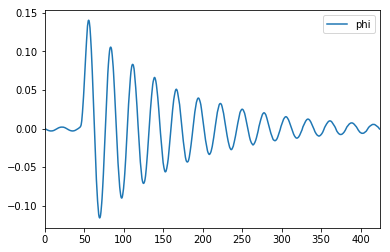

In [4]:
df.plot(y='phi')

In [5]:
index = df['phi'].abs().idxmax()
df_cut = df.loc[index:].copy()


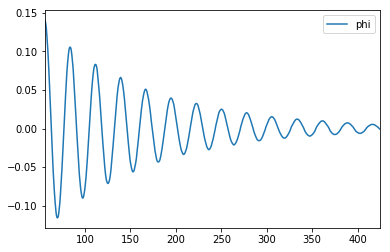

In [6]:
df_cut.plot(y='phi')

In [7]:
df_cut['phi1d'] = np.gradient(df_cut['phi'],df_cut.index)

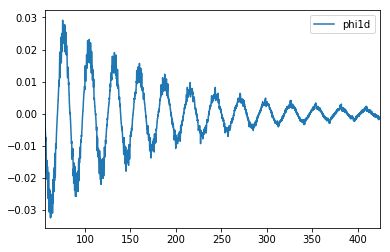

In [8]:
df_cut.plot(y='phi1d')

In [9]:
def f(df, omega0, d, zeta):
    
    phi0 = df['phi'].iloc[0]
    phi1d0 = 0  # Rough assumption!
    
    t = df.index
    df_sim = simulate(t=t, phi0=phi0, phi1d0=phi1d0, omega0=omega0, d=d, zeta=zeta)
    return np.array(df_sim['phi'])

In [16]:
def fit(f,df,p0=None):
    
    ydata = df['phi']
    
    if p0 is None:
        p0 = [1,1,1]
    
    popt,pcov = curve_fit(f=f,xdata=df,ydata=ydata,p0=p0)
    
    signature = inspect.signature(f)
    parameter_names = list(signature.parameters.keys())[1:]
    
    parameter_values = list(popt)
    parameters = dict(zip(parameter_names, parameter_values))
    
    return parameters


In [34]:
T0_guess = 27
omega0_guess = 2*np.pi/T0_guess
d_guess = 0.16  # Qudratic damping
zeta_guess = 0.03  # Linear damping


parameters = fit(f=f, df=df_cut, p0=[omega0_guess,d_guess,zeta_guess])

In [35]:
parameters

{'d': -0.00922406882496804,
 'omega0': 0.22869824261069185,
 'zeta': 0.051884493539117796}

In [36]:
2*np.pi/parameters['omega0']

27.47369300023577

Text(0.5, 1.0, 'Simulation with paramters from PIT')

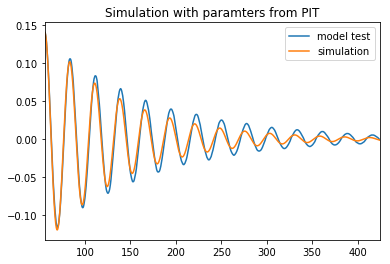

In [37]:
phi0 = df_cut['phi'].iloc[0]
phi1d0 = 0
df_sim = simulate(t=df_cut.index, **parameters, phi0=phi0, phi1d0=phi1d0)

fig,ax = plt.subplots()
df_cut.plot(y='phi', ax=ax, label='model test')
df_sim.plot(y='phi', ax=ax, label='simulation')
ax.set_title('Simulation with paramters from PIT')

Text(0.5, 1.0, 'Simulation with parameters from report')

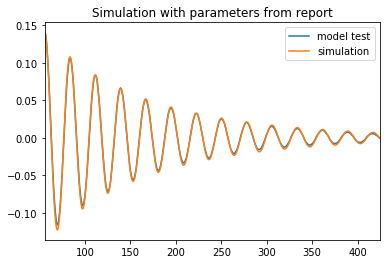

In [33]:
phi0 = df_cut['phi'].iloc[0]
phi1d0 = 0

parameters_report = {
    'd': 0.165,
    'omega0': 2*np.pi/27.77,
    'zeta': 0.0336,
}


df_sim = simulate(t=df_cut.index, **parameters_report, phi0=phi0, phi1d0=phi1d0)

fig,ax = plt.subplots()
df_cut.plot(y='phi', ax=ax, label='model test')
df_sim.plot(y='phi', ax=ax, label='simulation')
ax.set_title('Simulation with parameters from report')